In [17]:
# Import libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.stats.multicomp as mc
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

#Read in the data 

df = pd.read_csv('movies.csv')


In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Let's see if there is missing data 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing,2)))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.28%
gross - 0.02%
company - 0.0%
runtime - 0.0%


In [4]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#Change data type of columns
df['budget'] = df['budget'].astype('Int64')  # Use 'Int64' to handle non-finite values
df['gross'] = df['gross'].astype('Int64')  # Use 'Int64' to handle non-finite values

In [7]:
# Create correct year column
df['released_clean'] = pd.to_datetime(df['released'].str.replace(r'\s\([^\)]+\)', '', regex=True))
df['year_correct'] = df['released_clean'].dt.year

In [9]:
df = df.sort_values(by=['gross'], inplace = False, ascending=False)

In [11]:
# Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_clean,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0,2020-10-23,2020.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0,2020-02-07,2020.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN,2020-04-27,2020.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0,2020-10-01,2020.0


In [13]:
# Hypothese : Budget high correlation 
# Company high correlation


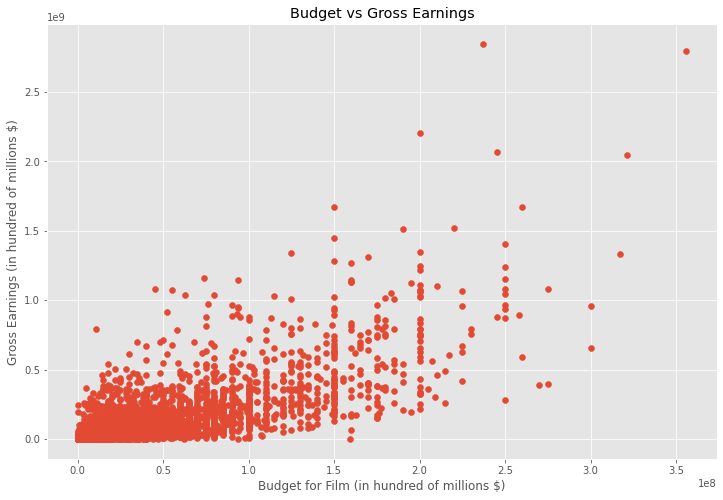

In [17]:
# Change data type of columns
df['budget'] = df['budget'].astype('float')
df['gross'] = df['gross'].astype('float')
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film (in hundred of millions $)')
plt.ylabel('Gross Earnings (in hundred of millions $)')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

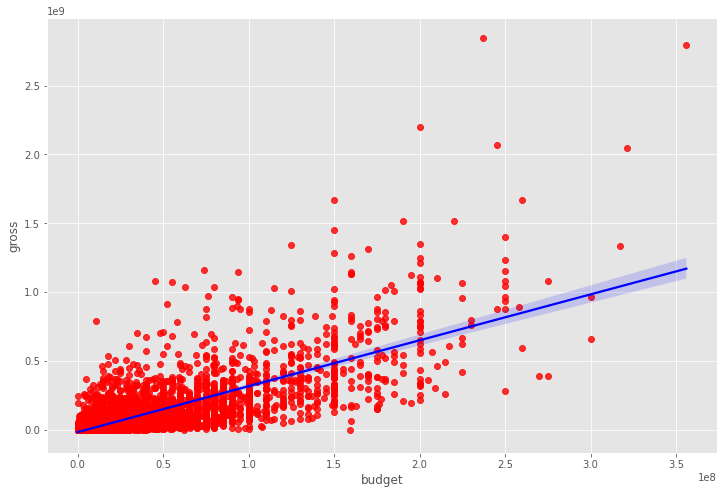

In [19]:
# plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [21]:
# Let's start looking at correlation 
df.corr(method='pearson') #Pearson

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.997415
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636
year_correct,0.997415,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000


In [23]:
# High correlation between budget and gross

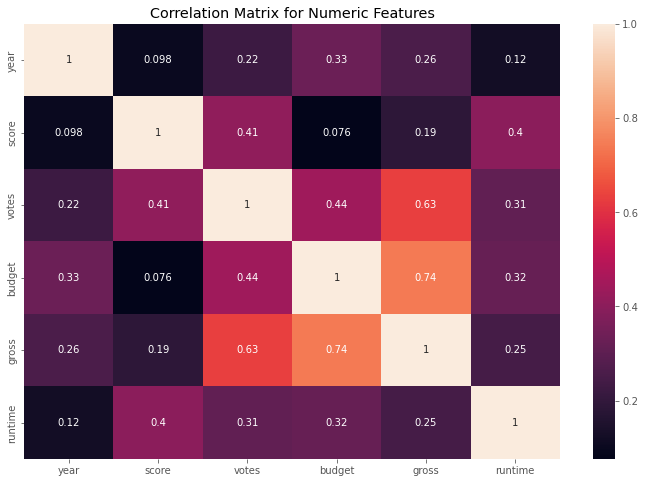

In [30]:
correlation_matrix = df.corr(method='pearson') #Pearson
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [ ]:
# Here we transform qualtitative variable to quantitative. I does not make any sense. We should use either T-test
# Or ANOVA test. ANOVA test seems to be more appropriate

In [27]:
df_numerized = df
for col_name in df_numerized.columns: 
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_clean,year_correct
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,2009-12-18,2009.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,2019-04-26,2019.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,1997-12-19,1997.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,2015-12-18,2015.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,2018-04-27,2018.0


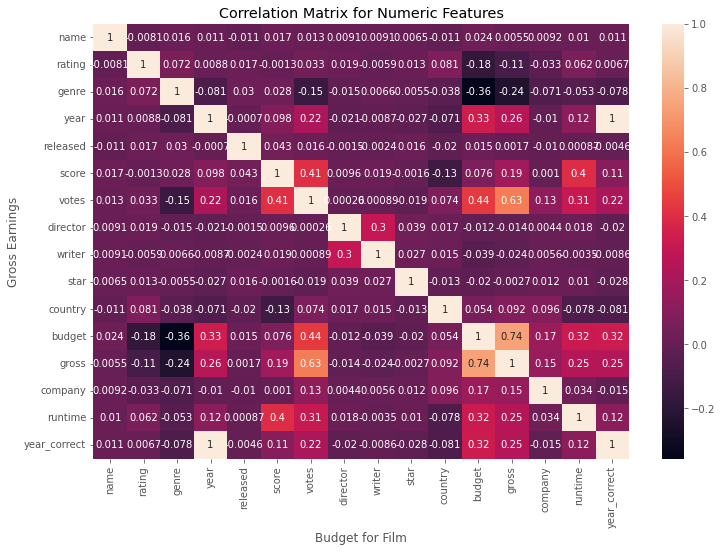

In [29]:
correlation_matrix = df_numerized.corr(method='pearson') #Pearson
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [31]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
pd.set_option('display.max_rows', None)


In [33]:
sorted_pairs = corr_pairs.sort_values()


In [35]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

votes         gross           0.630757
gross         votes           0.630757
              budget          0.740395
budget        gross           0.740395
year          year_correct    0.997415
year_correct  year            0.997415
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earnings
#Now we will use ANOVA test to compare quantitative variable with qualitative variable

Before conducting ANOVA, it's essential to check for the assumptions of ANOVA:

Independence of observations: This is usually a given in dataset designs like yours.
Normality: The distribution of the gross within each group should be approximately normal. This can be relaxed with large sample sizes.
Homogeneity of variances: The variance of gross should be similar across the groups.

In [7]:
#Anova Test 
cleaned_data = df.dropna(subset=['gross', 'rating'])
# Ensure there are sufficient observations for each rating category
rating_counts = cleaned_data['rating'].value_counts()
sufficient_data_ratings = rating_counts[rating_counts > 30].index.tolist()
filtered_data = cleaned_data[cleaned_data['rating'].isin(sufficient_data_ratings)]
rating_groups_filtered = filtered_data.groupby('rating')['gross'].apply(list).tolist()

# Perform ANOVA with filtered data
anova_result_filtered = f_oneway(*rating_groups_filtered)

print(anova_result_filtered)


F_onewayResult(statistic=101.7725853027684, pvalue=3.888626055794621e-104)


Interpretation Related to Movie Ratings and Gross
This ANOVA result suggests that the rating a movie receives is significantly associated with its gross earnings. Movies with different ratings (e.g., G, PG, PG-13, R) do not all perform the same in terms of gross earnings; some ratings are associated with higher or lower average gross earnings. Without specific post-hoc analysis results (such as Tukey's HSD) directly comparing each pair of movie ratings, it's challenging to definitively say which ratings perform the "best" in terms of gross earnings based on the ANOVA test alone


Below, I'll provide a generic Python function that you can use to perform ANOVA tests for any qualitative variable against gross. This function will preprocess the data by removing rows with missing values, filter out categories with insufficient observations, and then perform the ANOVA test

In [13]:
def perform_anova(df, qualitative_var, quantitative_var, min_obs=30):
    """
    Perform an ANOVA test for a qualitative variable against a quantitative variable.
    
    Parameters:
    - data: pandas DataFrame containing the dataset.
    - qualitative_var: string, the name of the qualitative variable.
    - quantitative_var: string, the name of the quantitative variable.
    - min_obs: int, minimum number of observations for each category to be included in the analysis.
    
    Returns:
    - ANOVA test result.
    """
    # Preprocessing: Remove rows with NaN values in the qualitative or quantitative variables
    cleaned_data = df.dropna(subset=[qualitative_var, quantitative_var])
    
    # Ensure there are sufficient observations for each category
    category_counts = cleaned_data[qualitative_var].value_counts()
    sufficient_data_categories = category_counts[category_counts >= min_obs].index.tolist()
    
    # Filter data to include only categories with sufficient observations
    filtered_data = cleaned_data[cleaned_data[qualitative_var].isin(sufficient_data_categories)]
    
    # Group data by the qualitative variable and collect the quantitative variable values
    groups = filtered_data.groupby(qualitative_var)[quantitative_var].apply(list).tolist()
    
    # Perform ANOVA
    return f_oneway(*groups)

# Example usage:
# Perform ANOVA for 'country' against 'gross'
anova_result_country = perform_anova(df, 'country', 'gross')
print("Country vs Gross:", anova_result_country)

# Perform ANOVA for 'company' against 'gross'
anova_result_company = perform_anova(df, 'company', 'gross')
print("Company vs Gross:", anova_result_company)

Country vs Gross: F_onewayResult(statistic=10.169605448061706, pvalue=4.271975081374635e-23)
Company vs Gross: F_onewayResult(statistic=10.109297180449309, pvalue=1.7105093748232413e-40)


F-value of 10.1696 suggests that there are differences in mean gross earnings across different countries.
The p-value tells you the probability of observing your data (or something more extreme) if the null hypothesis is true. A very small p-value (in this case, 4.27e-23) indicates that the observed differences in mean gross earnings across countries are highly unlikely to have occurred by chance.

General Interpretation
For both tests, the extremely low p-values indicate strong evidence against the null hypothesis, suggesting significant differences in movie gross earnings based on the country of origin and the producing company.

In [34]:
#Further investigation which countries or companies tend to produce higher or lower grossing movies.
#conduct post-hoc tests (e.g., Tukey's HSD) to compare all pairs of groups and identify where the significant differences lie.

# Preprocessing similar to what was done before ANOVA
def preprocess_data_for_posthoc(df, qualitative_var, quantitative_var, min_obs=30):
    cleaned_data = df.dropna(subset=[qualitative_var, quantitative_var])
    category_counts = cleaned_data[qualitative_var].value_counts()
    sufficient_data_categories = category_counts[category_counts >= min_obs].index.tolist()
    return cleaned_data[cleaned_data[qualitative_var].isin(sufficient_data_categories)]

# Preprocess data for 'country'
data_country = preprocess_data_for_posthoc(df, 'country', 'gross')

# Preprocess data for 'company'
data_company = preprocess_data_for_posthoc(df, 'company', 'gross')

# Perform Tukey's HSD for 'country'
tukey_country = pairwise_tukeyhsd(endog=data_country['gross'], groups=data_country['country'], alpha=0.05)
print(tukey_country)

# Perform Tukey's HSD for 'company'
tukey_company = pairwise_tukeyhsd(endog=data_company['gross'], groups=data_company['company'], alpha=0.05)


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
    group1         group2         meandiff    p-adj       lower          upper      reject
------------------------------------------------------------------------------------------
     Australia         Canada   -1788999.9771    1.0  -74674498.6942  71096498.7399  False
     Australia          China  184748429.7692    0.0   78053001.3658 291443858.1726   True
     Australia        Denmark  -22549731.4816    1.0 -139338914.0138  94239451.0506  False
     Australia         France   -2546551.7329    1.0  -71830002.6137  66736899.1479  False
     Australia        Germany   18621226.0114    1.0  -60708732.0608  97951184.0836  False
     Australia      Hong Kong    6393403.5192    1.0 -100302024.8842 113088831.9226  False
     Australia          India   -7853328.6117    1.0 -102096204.3889  86389547.1654  False
     Australia        Ireland  -17523400.6368    1.0 -122470605.0362  87423803.7627  False

To draw conclusions, you would typically look for rows where reject is True, indicating that there is a statistically significant difference between the group means at the chosen significance level (commonly 0.05).

Based on the Tukey HSD post-hoc test results

Australia vs. China: There is a significant difference in means, with China having a higher mean than Australia by approximately 184.7 million (p < 0.01). This suggests that whatever metric we are measuring (likely 'gross' earnings based on previous context), movies associated with China significantly outperform those associated with Australia in terms of this metric.

Canada vs. China: Similarly, Canada also has a significantly lower mean than China by approximately 186.5 million (p < 0.01). This again indicates that China is associated with higher values of the measured metric compared to Canada

Canada vs. United States: There is a significant difference between Canada and the United States, with the U.S. having a higher mean by about 56.7 million (p < 0.01). This indicates that the United States is associated with higher values of the measured metric compared to Canada.

Several other pairs show significant differences, and the general trend suggests that the location (presumably the country of movie production or setting) has a significant impact on the measured metric.

It is important to note that while the Tukey HSD test can tell us that there is a significant difference between group means, it does not explain why these differences exist. Further investigation into the specific factors contributing to these differences would be necessary to draw more detailed conclusions.

Additionally, the large differences in means between certain countries and the significant p-values suggest robust differences, not likely to be due to random variation or sampling error. 



In [32]:
# Now we do the same with genre. We optimize it so it is faster 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Check for NaN values and remove them
df.dropna(subset=['genre', 'gross'], inplace=True)

# Perform ANOVA
# We use OLS (Ordinary Least Squares) for a more detailed ANOVA analysis
model = ols('gross ~ C(genre)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print("ANOVA results:")
print(anova_results)

# If the ANOVA shows significant differences, proceed with Tukey's HSD
if anova_results['PR(>F)'][0] < 0.05:
    print("\nSignificant differences found. Performing Tukey's HSD...\n")
    # Perform Tukey's HSD
    tukey = pairwise_tukeyhsd(endog=df['gross'], groups=df['genre'], alpha=0.05)
    print(tukey)
else:
    print("\nNo significant differences found among genres based on gross earnings.")


ANOVA results:
                sum_sq      df          F         PR(>F)
C(genre)  2.329632e+19    17.0  56.151306  3.212683e-180
Residual  1.820856e+20  7461.0        NaN            NaN

Significant differences found. Performing Tukey's HSD...



/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
  group1    group2      meandiff    p-adj       lower           upper      reject
---------------------------------------------------------------------------------
   Action Adventure  -36183350.6238  0.003   -65938868.429   -6427832.8185   True
   Action Animation   93721406.6056   -0.0    61087655.717  126355157.4942   True
   Action Biography  -97634257.9791   -0.0 -127030565.2669  -68237950.6914   True
   Action    Comedy -101176706.5468   -0.0 -118876248.0971  -83477164.9965   True
   Action     Crime -106107384.6791   -0.0 -133053413.2107  -79161356.1476   True
   Action     Drama -106577621.3513   -0.0 -126075101.3589  -87080141.3438   True
   Action    Family   50663911.6094 0.9999 -114259475.0275  215587298.2462  False
   Action   Fantasy -106799252.1243 0.0013 -191003103.7378  -22595400.5107   True
   Action    Horror  -98136171.7182   -0.0 -131987128.6829  -64285214.7534   True
   Action     Mu

In summary, the ANOVA test conclusively shows that the genre of a movie significantly affects its gross earnings, highlighting the importance of genre selection in the film's financial performance.

Significant Differences
Action vs. Adventure: Adventure films have a significantly higher mean gross than Action films by approximately $36.2 million. This suggests that Adventure films, on average, perform better at the box office compared to Action films.

Action vs. Animation: Animation films significantly outperform Action films, with a mean difference of about $93.7 million. This indicates that Animation films tend to have much higher gross earnings, highlighting the broad appeal of animated content.

Action vs. Biography/Drama/Crime: Biography, Drama, and Crime genres have significantly lower mean gross earnings compared to Action films, by approximately $97.6 million, $106.6 million, and $106.1 million, respectively. This might reflect audience preferences for more visually stimulating or high-paced genres over these more narrative-driven genres.

Action vs. Fantasy/Horror: Both Fantasy and Horror genres show a significantly lower mean gross compared to Action films, indicating that Action films tend to perform better than these genres. However, the significant difference in Fantasy is conditional upon the p-adj value correction.


CONCLUSION 

High-Performing Genres: Animation and Adventure emerge as high-performing genres with significantly higher gross earnings compared to many other genres, suggesting their strong market appeal.

Genres That Perform the Best:
Animation: Significantly outperforms many other genres like Action, Biography, Drama, and even Fantasy. The positive mean differences indicate that Animation has one of the highest gross earnings.
Adventure: Also shows strong performance, especially when compared to genres like Action, indicating higher gross earnings.

Genres That Perform the Least:
Action compared to Animation and Adventure: While Action films have a significant audience, in direct comparison, they gross less than films in the Animation and Adventure genres. However, Action films still perform better than some other genres, indicating a mid-tier performance.
Drama and Biography: These genres show significantly lower gross earnings compared to Action, indicating they might be among the lower-performing genres in terms of box office gross. This could be due to their typically more serious or niche content, which may attract smaller audiences compared to the mass appeal genres.

Country that perform the best : 
The significant positive mean difference when compared to other countries indicates that China is a top performer in terms of gross earnings among the countries analyzed.